# Investigation of Python data visualization tools

## Introduction

See the very useful 3-part post on the [Anaconda website](https://www.anaconda.com/python-data-visualization-2018-why-so-many-libraries/)

![python-vis-landscape](https://www.anaconda.com/wp-content/uploads/2019/01/PythonVisLandscape.jpg)

## Matplotlib

`matplotlib` is by far the most popular and widely used package in the scientific data visualization community. It is an old and very mature project, and yet still sees very active development.
It is the go-to library for creating publishable vector graphics pdf figures in articles, and specialises in 2D plots.

It is either already installed on most systems, or very easy to install on all platforms. Its strength is on high-quality static figures, and is behind other projects on the interactivity side of things.

It has some 3D capabilities through the `Axes3D`.

To see what `matplotlib` can do, a good place to go is [its sample plots page](https://matplotlib.org/tutorials/introductory/sample_plots.html).

When talking about `matplotlib`, a common complaint that arises is that the API is a little difficult to get around, especially for a non-experienced user/programmer. This is somewhat true, but in some sense a little inevitable in a highly customizable tool. It is however relatively straightforward to hide the interface from the user by creating pre-made wrapper functions that will cover 90% of the cases the users are after.

Examples of this are very common, for example the `pandas` library uses `matplotlib` for creating plots from the contents of its data frames, via a simple `.plot` method.

### Interactivity

The `matplotlib` library allows multiple interactivity options with mouse events (scrolling, clicking), as well as via its own set of `widgets`. These include sliders, radio buttons, check boxes, etc... and are a nice alternative to `ipywidgets`, guaranteed to work out-of-the-box with matplotlib figures.

The image below is a diagram listing all the available widgets.
![mpl widgets](https://matplotlib.org/3.1.0/_images/inheritance-9d71a95f6d3ec40d1246549117ad7959f7b88c66.png)

#### A few noteable examples of interactive plots

##### Scrolling with the mouse through the 3rd dimension of a 3D data cube

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


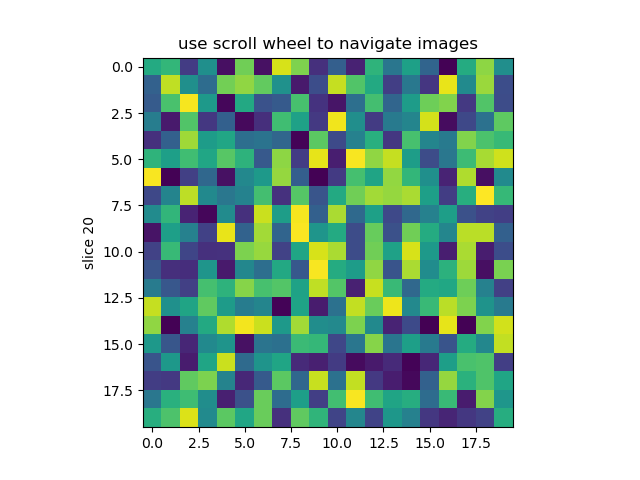

In [7]:
class IndexTracker(object):
    def __init__(self, ax, X):
        self.ax = ax
        ax.set_title('use scroll wheel to navigate images')

        self.X = X
        rows, cols, self.slices = X.shape
        self.ind = self.slices//2

        self.im = ax.imshow(self.X[:, :, self.ind])
        self.update()

    def onscroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = np.clip(self.ind + 1, 0, self.slices - 1)
        else:
            self.ind = np.clip(self.ind - 1, 0, self.slices - 1)
        self.update()

    def update(self):
        self.im.set_data(self.X[:, :, self.ind])
        ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()


fig, ax = plt.subplots(1, 1)

X = np.random.rand(20, 20, 40)

tracker = IndexTracker(ax, X)


fig.canvas.mpl_connect('scroll_event', tracker.onscroll)
plt.show()

##### Click on a legend item to hide/show the corresponding line

<IPython.core.display.Javascript object>


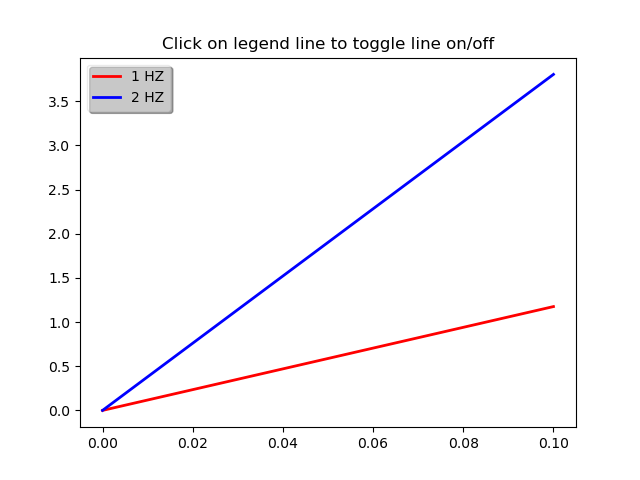

In [8]:
t = np.arange(0.0, 0.2, 0.1)
y1 = 2*np.sin(2*np.pi*t)
y2 = 4*np.sin(2*np.pi*2*t)

fig, ax = plt.subplots()
ax.set_title('Click on legend line to toggle line on/off')
line1, = ax.plot(t, y1, lw=2, color='red', label='1 HZ')
line2, = ax.plot(t, y2, lw=2, color='blue', label='2 HZ')
leg = ax.legend(loc='upper left', fancybox=True, shadow=True)
leg.get_frame().set_alpha(0.4)


# we will set up a dict mapping legend line to orig line, and enable
# picking on the legend line
lines = [line1, line2]
lined = dict()
for legline, origline in zip(leg.get_lines(), lines):
    legline.set_picker(5)  # 5 pts tolerance
    lined[legline] = origline


def onpick(event):
    # on the pick event, find the orig line corresponding to the
    # legend proxy line, and toggle the visibility
    legline = event.artist
    origline = lined[legline]
    vis = not origline.get_visible()
    origline.set_visible(vis)
    # Change the alpha on the line in the legend so we can see what lines
    # have been toggled
    if vis:
        legline.set_alpha(1.0)
    else:
        legline.set_alpha(0.2)
    fig.canvas.draw()

fig.canvas.mpl_connect('pick_event', onpick)

plt.show()

##### Slider and RadioButtons demo

<IPython.core.display.Javascript object>


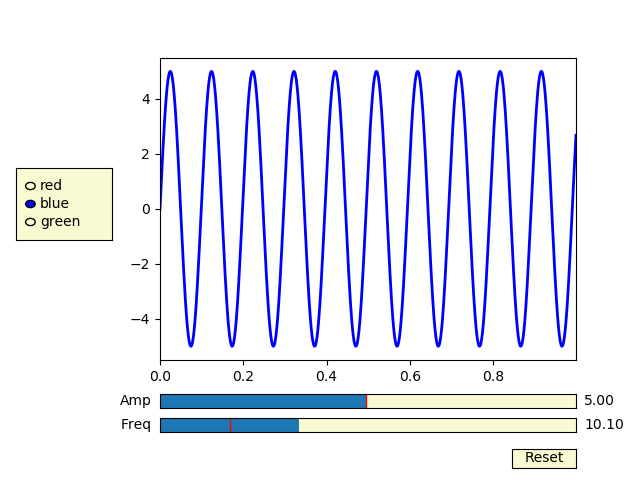

In [9]:
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
delta_f = 5.0
s = a0 * np.sin(2 * np.pi * f0 * t)
l, = plt.plot(t, s, lw=2)
ax.margins(x=0)

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0, valstep=delta_f)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()


sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()

### Summary

## Plotly

`plotly` is a very popular library for creating highly interactive plots to be used in a web-browser. It is `Javascript` based, but also has a complete `Python` API, making it well suited for Jupyter notebook use.

It is also possible to use a custom renderer and open a `plotly` graph inside a Qt window, 

In [10]:
import os, sys
from PyQt5.QtWidgets import QApplication
from PyQt5.QtCore import QUrl
from PyQt5 import QtWebEngineWidgets
import plotly.io as pio
import plotly.offline as offplt
import plotly.graph_objs as go


class PlotlyViewer(QtWebEngineWidgets.QWebEngineView):
    def __init__(self, fig, exec=True):
        # Create a QApplication instance or use the existing one if it exists
        self.app = QApplication.instance() if QApplication.instance() else QApplication(sys.argv)

        super().__init__()

        self.file_path = os.path.abspath(os.path.join(os.path.dirname(__file__), "temp.html"))
        html = offplt.plot(fig, output_type='', auto_open=False, include_plotlyjs="True")
        print(html)
        self.setHtml(html)
        self.setWindowTitle("Plotly Viewer")
        self.show()

        if exec:
            self.app.exec_()

    def closeEvent(self, event):
        os.remove(self.file_path)


# Or a custom external renderer
class MyExternalRenderer(pio.base_renderers.ExternalRenderer):
    def activate(self):
        pass

    def render(self, fig_dict):
        for key, fig in fig_dict.items():
            win = PlotlyViewer(fig)


# Register for use by name
my_renderer = MyExternalRenderer()
pio.renderers['my_renderer'] = my_renderer

fig = go.Figure()
fig.add_scatter(x=np.random.rand(100), y=np.random.rand(100), mode='markers',
                marker={'size': 30, 'color': np.random.rand(100), 'opacity': 0.6,
                        'colorscale': 'Viridis'})
fig.show(renderer='my_renderer')

NameError: name '__file__' is not defined